## Лабораторная работа №1 | Вариант 6

Выполнил: Ляхов В.А. М8О-303Б-22

### 1. Numpy

In [1]:
import numpy as np

1. Создайте единичную матрицу размером 3х3

In [2]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

2. Создайте матрицу 5х5 со значениями 1, 2, 3, 4 ниже диагонали

In [3]:
np.tril(np.arange(1,6), k =-1)

array([[0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 2, 0, 0, 0],
       [1, 2, 3, 0, 0],
       [1, 2, 3, 4, 0]])

3. Какой выход будет у данного скрипта

```python
# Author: Jake VanderPlas

print(sum(range(5),-1))
from numpy import *
print(sum(range(5),-1))
```

In [6]:
9
10

10

4. Как найти самое часто встречаемое значение между двумя массивами? 

In [4]:
array1 = np.array([1, 1, 1, 3, 3, 5])
array2 = np.array([1, 3, 3, 3, 3, 3])

common_elements = np.intersect1d(array1, array2)

counts = np.array([np.count_nonzero(array1 == elem) + np.count_nonzero(array2 == elem) for elem in common_elements])

most_common_index = np.argmax(counts)
most_common_value = common_elements[most_common_index]

print(most_common_value)

3


5. Как игнорировать все warnings в numpy(не нужно так делать, но покажи)?

In [5]:
import warnings

warnings.filterwarnings('ignore', category=Warning)

6. Реализуем функцию-генератор, которая генерирует 10 целых чисел и используем ее для построения массива

In [6]:
def generate_integers():
    for _ in range(10):
        yield np.random.randint(1, 100)

np.array(list(generate_integers()))

array([95, 63,  1, 36, 93, 67, 88, 35, 67, 41])

7. Создайте массив случайных чисел размером 10 и отсортируйте его

In [7]:
array = np.random.randint(1,100, size = 10)
sorted_array = np.sort(array)

print(array)
print(sorted_array)

[57 79 33 50 85  7 49 23 37 74]
[ 7 23 33 37 49 50 57 74 79 85]


8. Создайте случайную матрицу 10х2 которая представляет собой декартовые координаты и преобразуйте их в полярные

In [8]:
cartesian_coords = np.random.rand(10, 2) * 100

x = cartesian_coords[:, 0]
y = cartesian_coords[:, 1]

r = np.sqrt(x**2 + y**2) 
theta = np.arctan2(y, x)  

theta_deg = np.degrees(theta)

polar_coords = np.column_stack((r, theta_deg))


print("Декартовы координаты:")
print(cartesian_coords)
print("\nПолярные координаты:")
print(polar_coords)

Декартовы координаты:
[[79.88537426  7.86317435]
 [21.85239997 97.88202418]
 [93.15271666  2.9605756 ]
 [22.75940415 79.16484937]
 [62.30340651 47.14725894]
 [85.77312145  3.21501436]
 [35.08722793 47.11539743]
 [ 0.88321773  8.67102148]
 [33.20093186 27.92850409]
 [70.17018887 78.66867443]]

Полярные координаты:
[[ 80.27143036   5.62155609]
 [100.29166487  77.41495562]
 [ 93.19975123   1.82035923]
 [ 82.37149904  73.96038429]
 [ 78.13180203  37.11612102]
 [ 85.83335412   2.14659973]
 [ 58.74499331  53.32463835]
 [  8.71588705  84.18399327]
 [ 43.38551852  40.07042568]
 [105.41639219  48.26795844]]


9. Создайте структурированный массив который будет описывать пиксель(координату x, y и цвет r,g,b)

In [9]:
pixel_dtype = np.dtype([('x', int), ('y', int), ('r', int), ('g', int), ('b', int)])

pixel = np.array([
    (10, 20, 255, 0, 0),
], dtype=pixel_dtype)

pixel

array([(10, 20, 255, 0, 0)],
      dtype=[('x', '<i8'), ('y', '<i8'), ('r', '<i8'), ('g', '<i8'), ('b', '<i8')])

10. Как конвертировать тип массив от float32 в int32 in place?

In [10]:
arr_float32 = np.array([1.5, 2.7, 3.2, 4.8], dtype=np.float32)

# Конвертируем тип данных в int32 in place
arr_int32 = arr_float32.astype(np.int32)
arr_int32

array([1, 2, 3, 4], dtype=int32)

### 2. Pandas

Найдите ответы на вопросы или выполните действия с предложенным датасетом 

Набор данных описывает эффективность учеников в зависимости от некоторых факторов влияющих на обучение и окружение человека.

Файл: `student_perfomance.csv`

```
Hours_Studied - количество часов затраченное на обучение в неделю
Attendance - поцент посещенных занятий
Parental_Involvement - уровень участия родителей в обучении учащегося
Access_to_Resources - доступность ресурсов для обучения
Extracurricular_Activities - участие во внеклассных мероприятиях
Sleep_Hours - количество часов выделяемое на сон в день
Previous_Scores - оценка за первый экзамен
Motivation_Level - уровень мотивации
Internet_Access - доступ к интернету
Tutoring_Sessions - количество посещаемых репетиторских занятий в месяц.
Family_Income - доход семьи
Teacher_Quality - насколько качественно преподает учитель
School_Type - тип школы(частная, обычная)
Peer_Influence - влияние сверстников
Physical_Activity - физическая активность
Learning_Disabilities - наличие проблем с обучаемостью
Parental_Education_Level - уровень образования родителей
Distance_from_Home - дистанция от дома до школы
Gender - пол
Exam_Score - оценка на конечном экзамене
```

In [11]:
import pandas as pd

In [93]:
df = pd.read_csv('student_perfomance.csv')
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


1. Посчитайте среднее кол-во часов уделяемое на сон студентами

In [94]:
df['Sleep_Hours'].mean()

np.float64(7.029060087785682)

2. Сколько процентов студентов посещают внеклассовые активности?

In [95]:
total_students = len(df)
attended_students = len(df[df["Tutoring_Sessions"] > 0])

attendance_percentage = (attended_students / total_students) * 100
attendance_percentage

77.10004540638717

3. Правда ли, что в среднем девушки сдают экзамены лучше, чем мужчины

In [96]:
female_average_exam = df[df["Gender"] == "Female"]["Exam_Score"].mean()
male_average_exam = df[df["Gender"] == "Male"]["Exam_Score"].mean()

female_average_previous = df[df["Gender"] == "Female"]["Previous_Scores"].mean()
male_average_previous = df[df["Gender"] == "Male"]["Previous_Scores"].mean()


female_average = female_average_exam + female_average_previous
male_average = male_average_exam + male_average_previous
print(f"Средний балл девушек: {female_average}")
print(f"Средний балл мужчин: {male_average}")


Средний балл девушек: 142.29824561403507
Средний балл мужчин: 142.31200839014159


4. Выведите 25 и 75 перцентили времени сна студентов

In [97]:
sleep_hours_25th = df["Sleep_Hours"].quantile(0.25)
sleep_hours_75th = df["Sleep_Hours"].quantile(0.75)

print(f"25-й перцентиль времени сна: {sleep_hours_25th} часов")
print(f"75-й перцентиль времени сна: {sleep_hours_75th} часов")

25-й перцентиль времени сна: 6.0 часов
75-й перцентиль времени сна: 8.0 часов


5. Правда ли, что те, кто спит больше(75 перцентиль и выше) сдает экзамен лучше, чем студенты с недосыпом(25 перцентиль и меньше)

In [98]:
sleep_hours_25th = df["Sleep_Hours"].quantile(0.25)
sleep_hours_75th = df["Sleep_Hours"].quantile(0.75)

well_rested = df[df["Sleep_Hours"] >= sleep_hours_75th]
sleep_deprived = df[df["Sleep_Hours"] <= sleep_hours_25th]

well_rested_average = well_rested["Exam_Score"].mean()
sleep_deprived_average = sleep_deprived["Exam_Score"].mean()

# well_rested_average_previous = well_rested["Previous_Scores"].mean()
# sleep_deprived_average_previous = sleep_deprived["Previous_Scores"].mean()

#print(f"Средний балл выспавшихся: {well_rested_average + well_rested_average_previous}")
#print(f"Средний балл невыспавшихся: {sleep_deprived_average + sleep_deprived_average_previous}")

if (well_rested_average > sleep_deprived_average): print("В среднем студенты, которые спят больше , сдают экзамен лучше, чем студенты с недосыпом.")
else: print("В среднем студенты с недосыпом сдают экзамен лучше, чем студенты, которые спят больше.")

В среднем студенты с недосыпом сдают экзамен лучше, чем студенты, которые спят больше.


6. Влияет ли физическая активность на результаты экзамена?

In [99]:
average_scores = df.groupby("Physical_Activity")["Exam_Score"].mean()
average_scores

Physical_Activity
0    67.521739
1    66.969121
2    67.185003
3    67.196071
4    67.313016
5    67.603878
6    68.093750
Name: Exam_Score, dtype: float64

По данным видно что физическая активность не влияет на результаты экзамена.

7. Правда ли, что слуденты, чьи родители имеют высшее образование(College || Postgraduate), сдают экзамены лучше, чем остальные?

In [100]:
average_scores = df.groupby("Parental_Education_Level")["Exam_Score"].mean()

if(average_scores["College"] > average_scores["High School"] and average_scores["Postgraduate"] > average_scores["High School"]): print("Студенты, чьи родители имеют высшее образование, сдают экзамены лучше, чем остальные.")
else: print("Студенты, чьи родители имеют высшее образование, сдают экзамены не лучше, чем остальные.")

average_scores

Студенты, чьи родители имеют высшее образование, сдают экзамены лучше, чем остальные.


Parental_Education_Level
College         67.315737
High School     66.893577
Postgraduate    67.970881
Name: Exam_Score, dtype: float64

8. Как влияет участие родителей на результаты экзаменов

In [101]:
average_scores = df.groupby("Parental_Involvement")["Exam_Score"].mean()

if (average_scores["High"] > average_scores["Medium"] and average_scores["Medium"] > average_scores["Low"]): print("Большое участие родителей лучше влияет на результаты экзаменов")
elif(average_scores["High"] < average_scores["Medium"] and average_scores["Medium"] < average_scores["Low"]): print("Большое участие родителей хуже влияет на результаты экзаменов")
else: print("Для каждого студента участие родителей по-разному влияет на результаты экзаменов")

average_scores

Большое участие родителей лучше влияет на результаты экзаменов


Parental_Involvement
High      68.092767
Low       66.358265
Medium    67.098156
Name: Exam_Score, dtype: float64

9. Правда ли, что в семьях с доходом больше среднего дети сдают экзамены лучше?

In [102]:
average_scores = df.groupby("Family_Income")["Exam_Score"].mean()

if (average_scores["High"] > average_scores["Medium"] and average_scores["High"] > average_scores["Low"]): print("В семьях с доходом больше среднего дети сдают экзамены лучше")
else: print("В семьях с доходом больше среднего дети сдают экзамены не лучше, чем остальные")

average_scores

В семьях с доходом больше среднего дети сдают экзамены лучше


Family_Income
High      67.842396
Low       66.848428
Medium    67.334959
Name: Exam_Score, dtype: float64

10. Посчитайте долю студентов сдавших экзамен на более чем 70 баллов в семьях с низким доходом и отсутствием доступа к интернету

In [103]:
filtered_df_1 = df[(df["Family_Income"] == "Low") & (df["Internet_Access"] == "No")]
filtered_df_2 = filtered_df_1[(filtered_df_1["Exam_Score"] > 70)]

total_students = len(filtered_df_1)
passed_students = len(filtered_df_2)

proportion = passed_students / total_students

print(f"Доля студентов, сдавших экзамен на более чем 70 баллов, в семьях с низким доходом и без доступа к интернету: {proportion:.2f}")

Доля студентов, сдавших экзамен на более чем 70 баллов, в семьях с низким доходом и без доступа к интернету: 0.08


### 3. Визуализация

Используя библиотеки matplotlib/sns/plotly/pandas и набор данных представленный ранее визуализируйте

1. Правда ли, что количество часов затрачиваемых на сон распределено примерно нормально?

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns

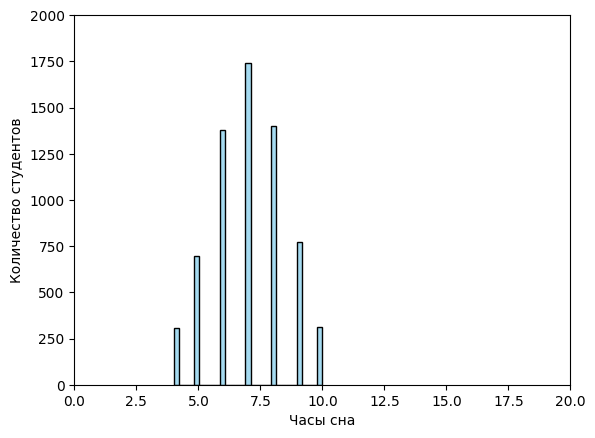

In [111]:
sns.histplot(data=df, x="Sleep_Hours", color="skyblue")
plt.xlabel("Часы сна")
plt.ylabel("Количество студентов")
plt.xlim(0, 20) 
plt.ylim(0, 2000) 
plt.show()

2. Постройте гистограмму распределения количества часов затрачиваемых на обучение среди мальчиков и девочек

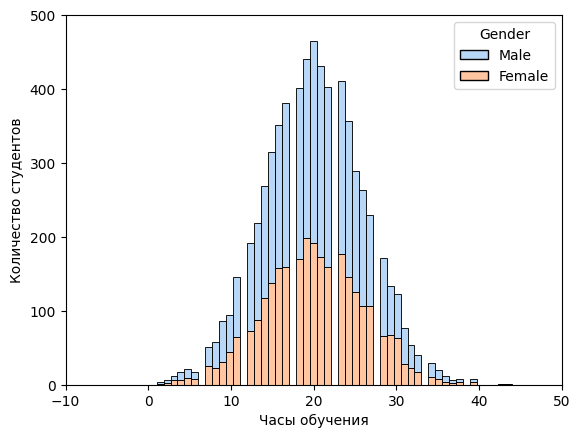

In [112]:
sns.histplot(data=df, x="Hours_Studied", hue="Gender",
             multiple="stack", palette="pastel")
plt.xlabel("Часы обучения")
plt.ylabel("Количество студентов")
plt.xlim(-10, 50) 
plt.ylim(0, 500)
plt.show()

3. Как зависит результат конечного экзамена от результата первого экзамена

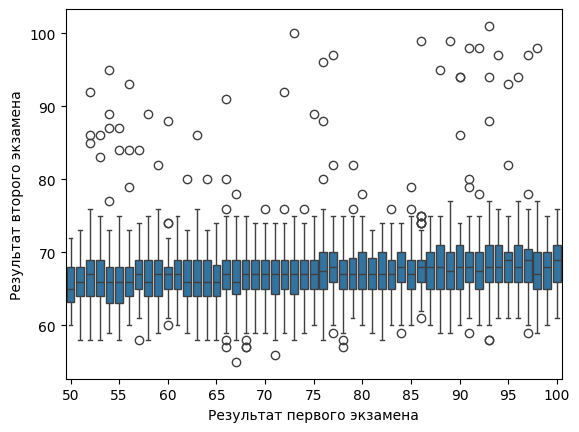

In [113]:
#grouped = df.groupby("Previous_Scores")["Exam_Score"].mean()
#plt.plot(grouped.index, grouped.values)
#plt.xlabel("Результат первого экзамена")
#plt.ylabel("Средний результат второго экзамена")
#plt.title("Зависимость среднего результата второго экзамена от первого")
#plt.xlim(45, 105) 
#plt.ylim(65, 70)
#plt.show()

sns.boxplot(x="Previous_Scores", y="Exam_Score", data=df)
plt.xlabel("Результат первого экзамена")
plt.ylabel("Результат второго экзамена")
plt.xticks(np.arange(0,55, 5)) 
plt.show()

4. Постройте box plot отображающий распределение количества сна детей сдавших экзамены на оценку ниже и выше 85 баллов

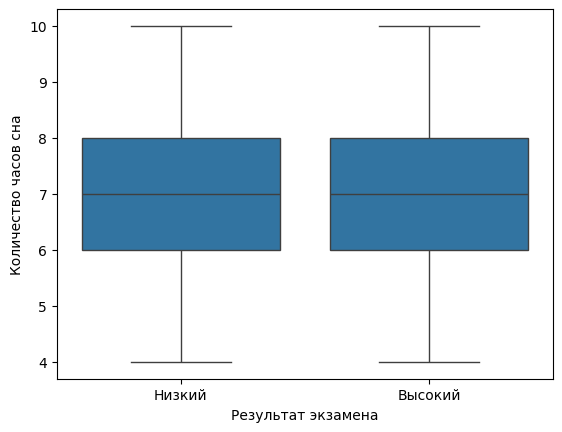

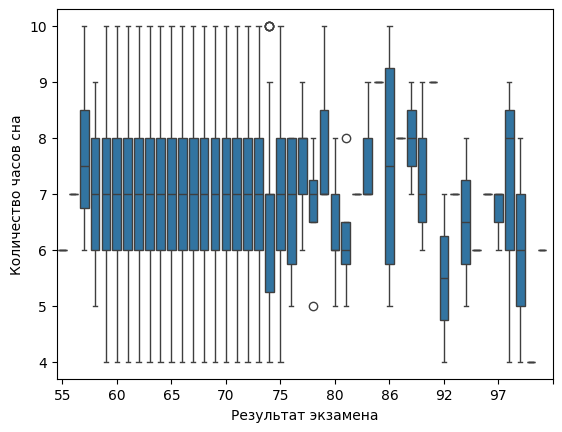

In [121]:

df['Exam_Result'] = ['Высокий' if score >= 85 else 'Низкий' for score in df['Exam_Score']]
sns.boxplot(x='Exam_Result', y='Sleep_Hours', data=df)
plt.xlabel("Результат экзамена")
plt.ylabel("Количество часов сна")
plt.show()

sns.boxplot(x='Exam_Score', y='Sleep_Hours', data=df)
plt.xlabel("Результат экзамена")
plt.ylabel("Количество часов сна")
plt.xticks(np.arange(0,50, 5)) 
plt.show()

5. Правда ли, что количество посещаемых занятий с репетитором в месяц напрямую влияет на балл в конечном экзамене?

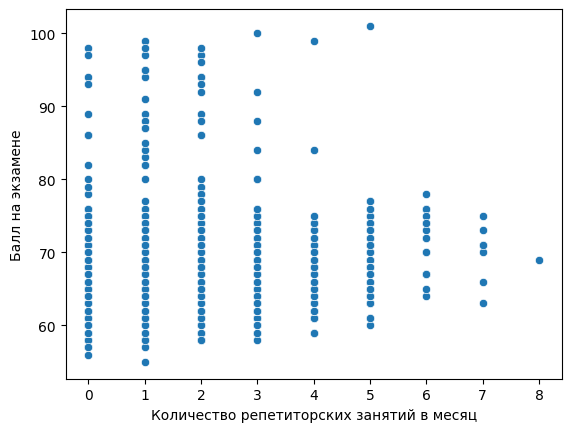

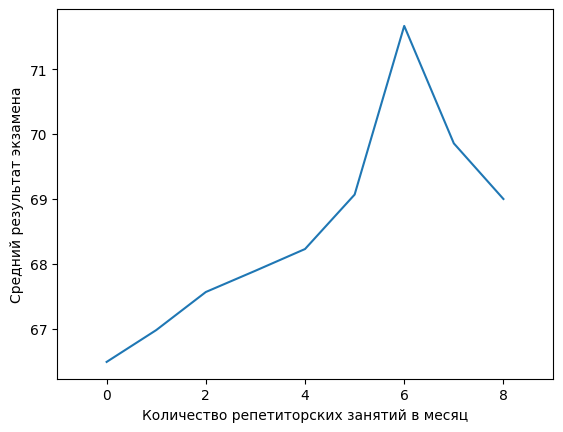

In [128]:
sns.scatterplot(data=df, x="Tutoring_Sessions", y="Exam_Score")
plt.xlabel("Количество репетиторских занятий в месяц")
plt.ylabel("Балл на экзамене")
plt.show()

grouped = df.groupby("Tutoring_Sessions")["Exam_Score"].mean()
plt.plot(grouped.index, grouped.values)
plt.xlabel("Количество репетиторских занятий в месяц")
plt.ylabel("Средний результат экзамена")
plt.xlim(-1, 9) 
plt.show()

Как видно из графика кол-во посещаемых занятий с репетитором в месяц не влияет напрямую на балл в конечном экзамене.

6. Как физическая активность влияет на успеваемость?

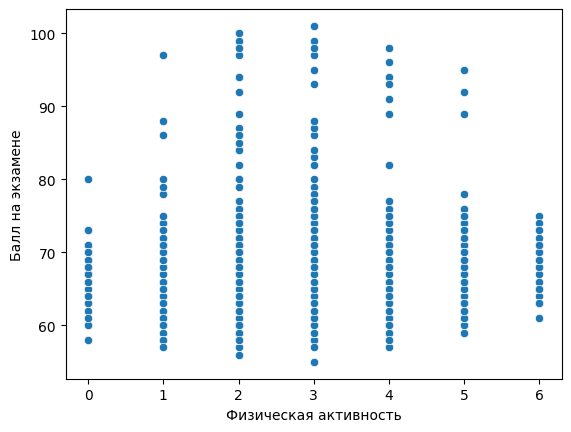

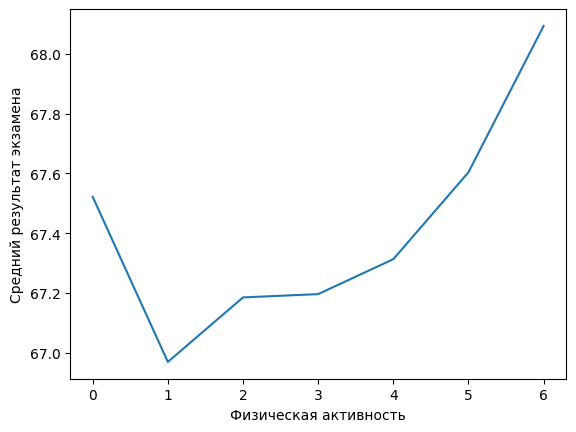

In [131]:
sns.scatterplot(data=df, x="Physical_Activity", y="Exam_Score")
plt.xlabel("Физическая активность")
plt.ylabel("Балл на экзамене")
plt.show()

grouped = df.groupby("Physical_Activity")["Exam_Score"].mean()
plt.plot(grouped.index, grouped.values)
plt.xlabel("Физическая активность")
plt.ylabel("Средний результат экзамена")
plt.show()

7. Постройте HeatMap где ось Х - процент посещаемость, Y - количество занятий с репетитором, а Z - балл за итоговый экзамен*

\* Задание на доп. балл

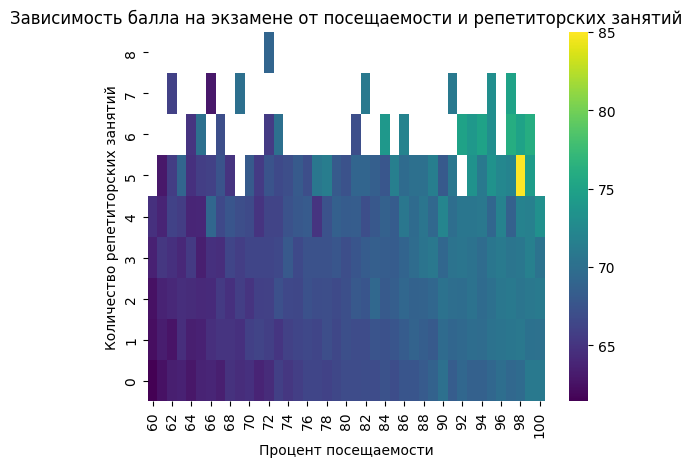

In [146]:
pivot_table = df.pivot_table(values='Exam_Score', index='Tutoring_Sessions', columns='Attendance')
pivot_table = pivot_table.sort_index(ascending=False)
# Строим HeatMap с помощью seaborn
sns.heatmap(pivot_table, cmap="viridis")
plt.ylabel("Количество репетиторских занятий")
plt.xlabel("Процент посещаемости")
plt.title("Зависимость балла на экзамене от посещаемости и репетиторских занятий")
plt.show()